<a href="https://colab.research.google.com/github/ucheokechukwu/courses/blob/main/Pytorch_For_Deep_Learning/08_pytorch_paper_replicating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rich -q
from rich import print, inspect, pretty
pretty.install()

In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.

[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.

Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4036, done.
remote: Counting objects: 100% (1224/1224), done.
remote: Compressing objects: 100% (226/226), done.
remote: Total 4036 (delta 1067), reused 1080 (delta 995), pack-reused 2812
Receiving objects: 100% (4036/4036), 651.50 MiB | 30.22 MiB/s, done.
Resolving deltas: 100% (2360/2360), done.
Updating files: 100% (248/248), done.


# Get Data

In [3]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"



[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


# 2. Create Data and Dataloader

In [4]:
# Create image size (from Table 3 in the ViT paper)
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")

# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


(
    ['pizza', 'steak', 'sushi']
)

In [5]:
image_batch, label_batch = next(iter(train_dataloader))

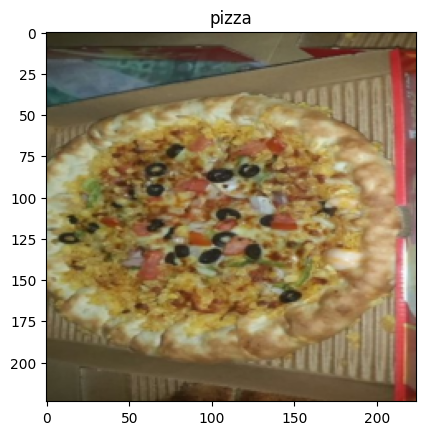

In [6]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import random
idx = random.choice(range(32))
image = image_batch[idx]
label = class_names[label_batch[idx]]

imshow(image.permute(2,1,0))

plt.title(label)
plt.show()

# 3. Replicating VIT Overview

### Figure 1

Embeddding = learnable representation. Start with random numbers and approve them over time.

--2023-12-15 19:44:08--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-intputs-outputs-layers-and-blocks.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281972 (275K) [image/png]
Saving to: ‘08-vit-paper-intputs-outputs-layers-and-blocks.png’

08-vit-paper-intput 100%[===================>] 275.36K  --.-KB/s    in 0.03s   

2023-12-15 19:44:08 (8.16 MB/s) - ‘08-vit-paper-intputs-outputs-layers-and-blocks.png’ saved [281972/281972]



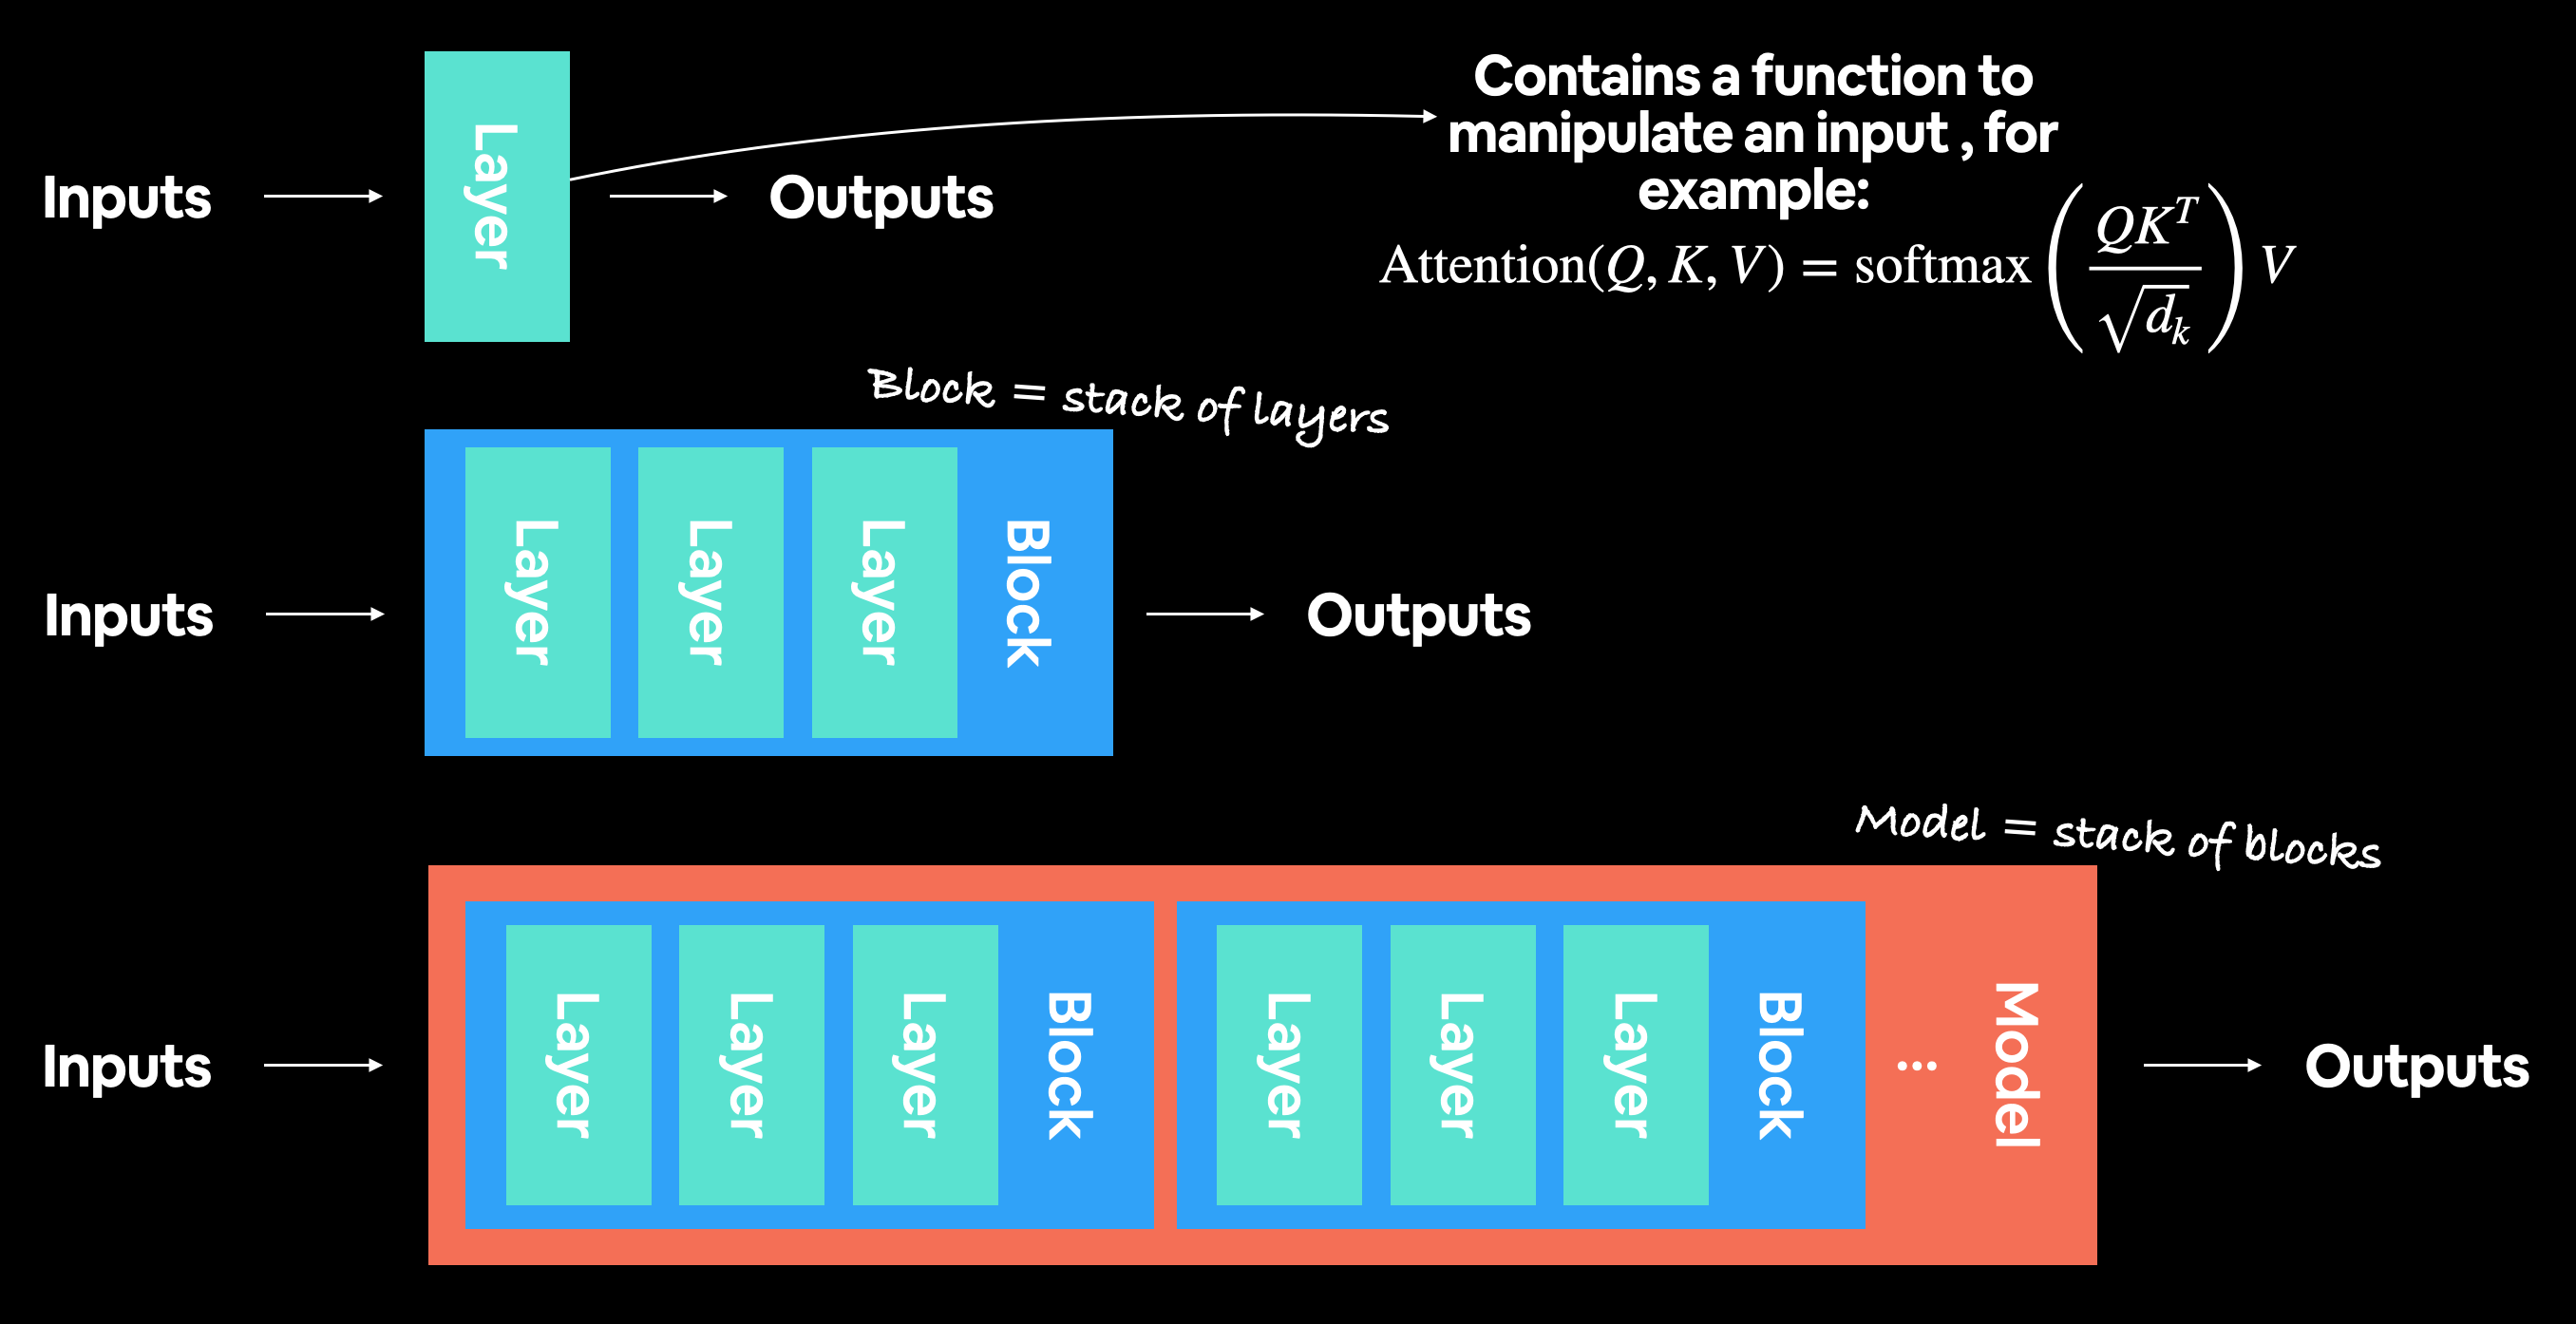

In [7]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-intputs-outputs-layers-and-blocks.png

import IPython
IPython.display.Image("08-vit-paper-intputs-outputs-layers-and-blocks.png")

--2023-12-15 19:44:08--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-figure-1-inputs-and-outputs.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 804489 (786K) [image/png]
Saving to: ‘08-vit-paper-figure-1-inputs-and-outputs.png’

08-vit-paper-figure 100%[===================>] 785.63K  --.-KB/s    in 0.05s   

2023-12-15 19:44:08 (16.7 MB/s) - ‘08-vit-paper-figure-1-inputs-and-outputs.png’ saved [804489/804489]



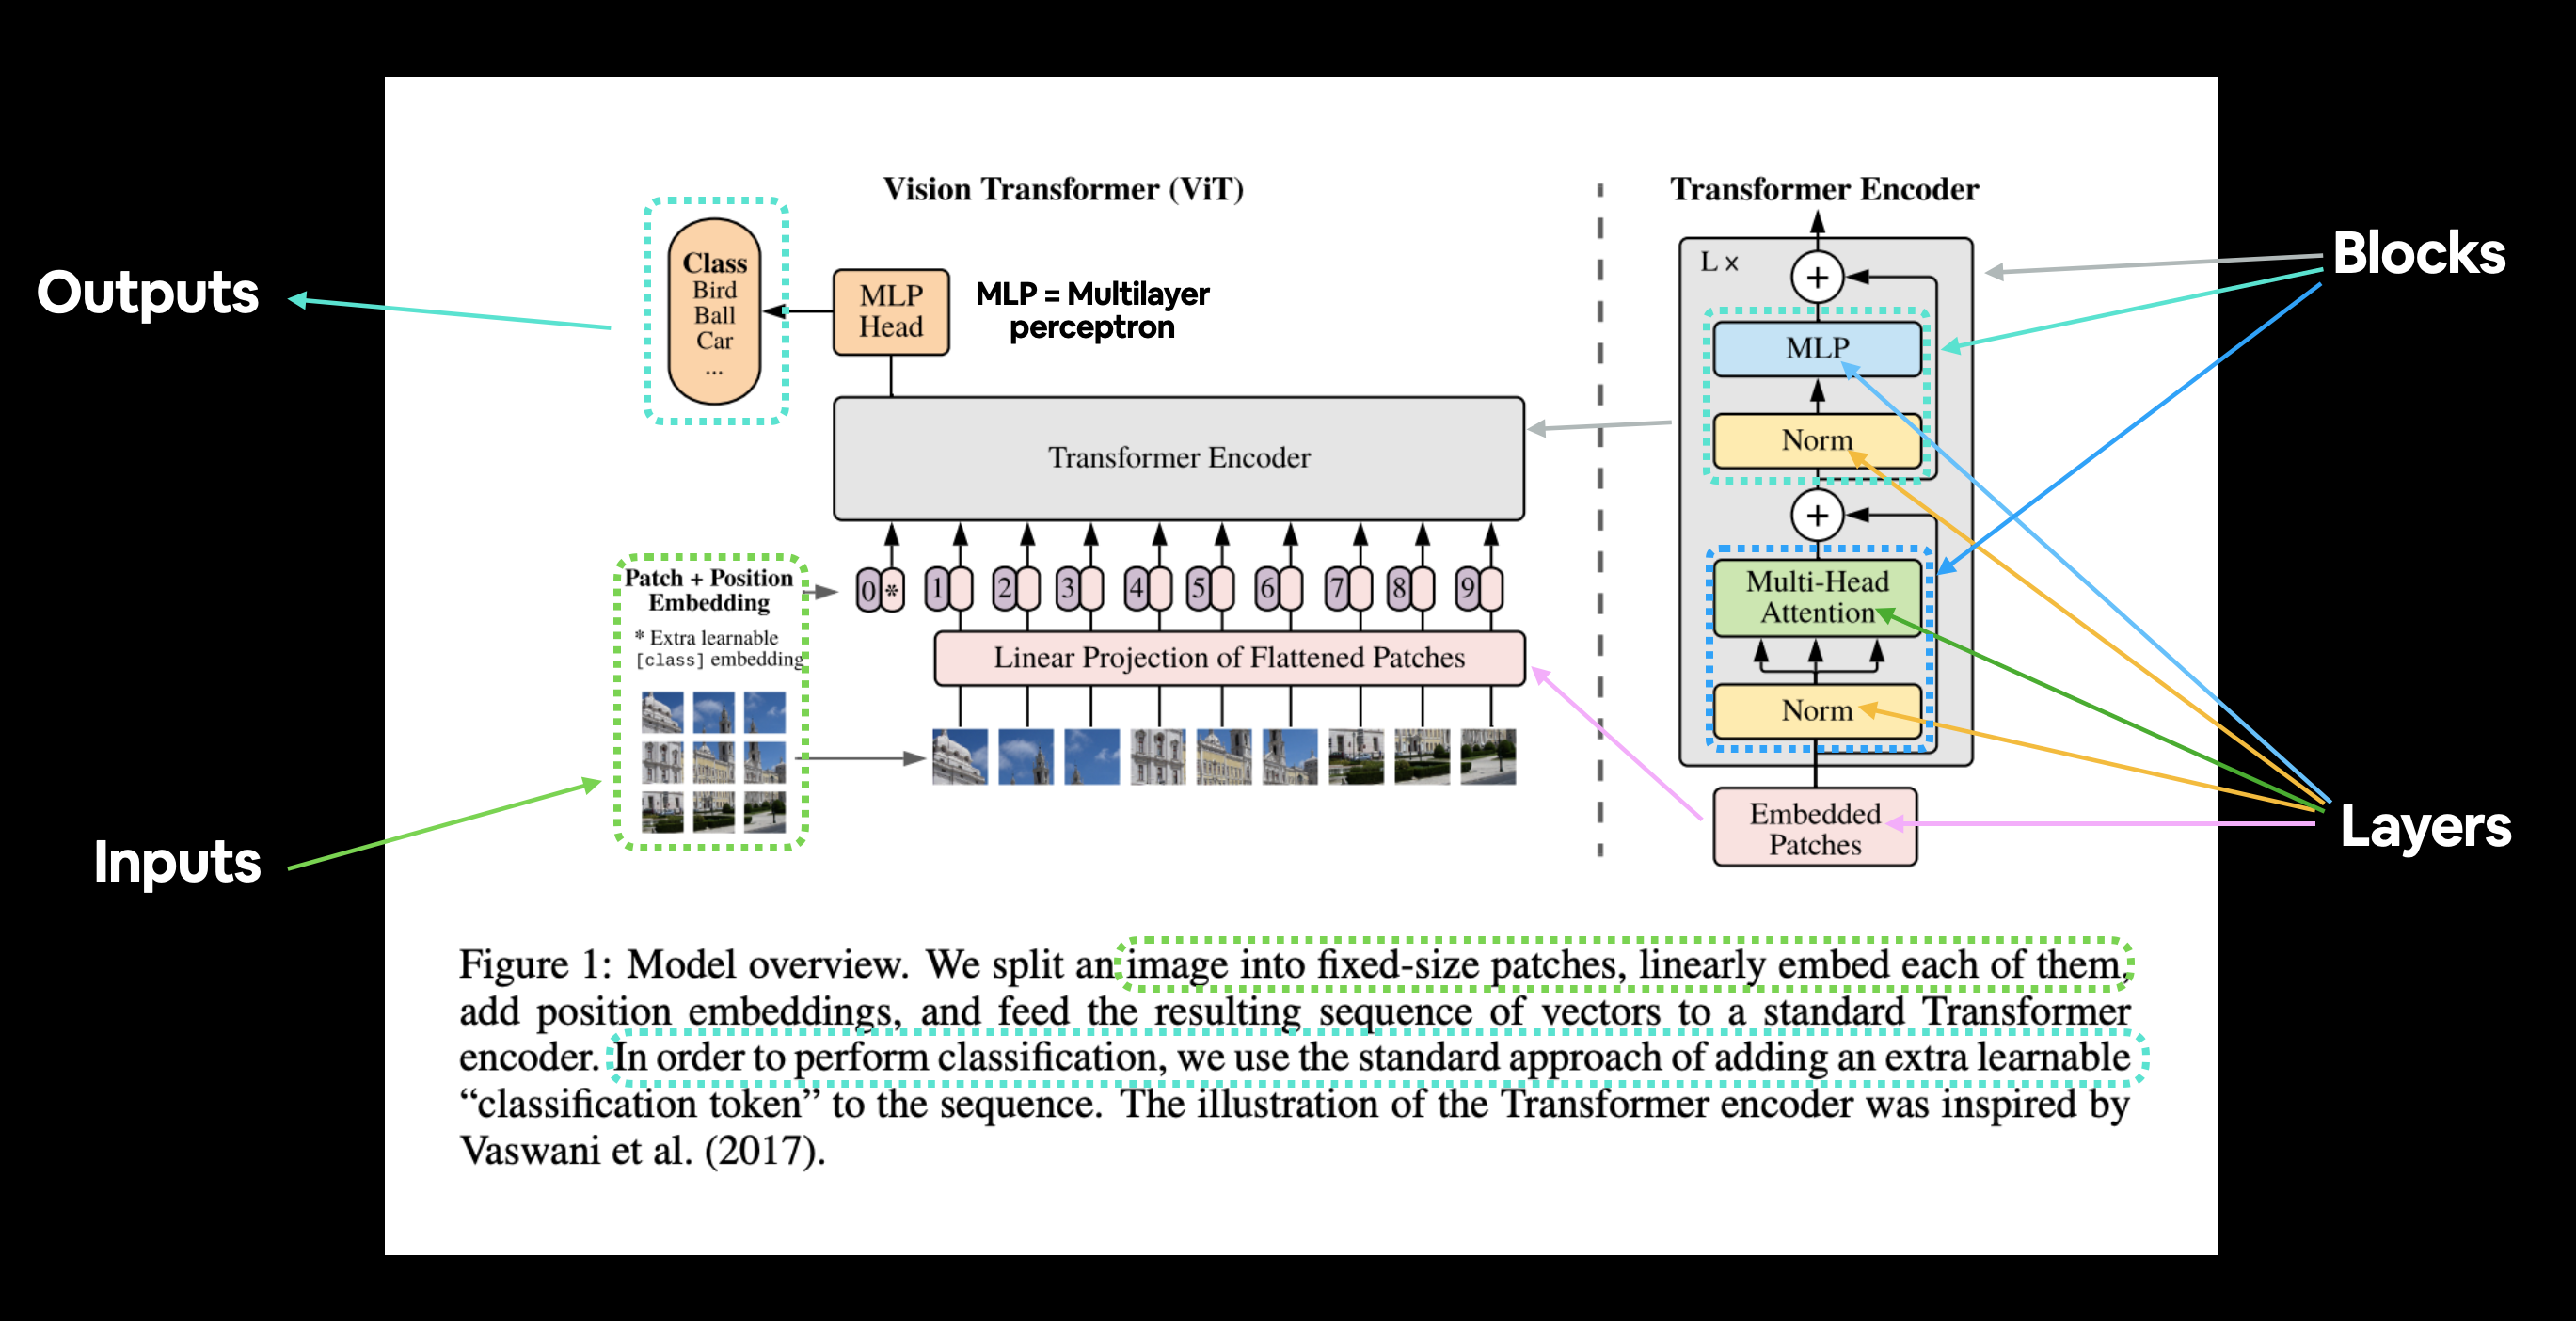

In [8]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-figure-1-inputs-and-outputs.png

IPython.display.Image("08-vit-paper-figure-1-inputs-and-outputs.png")


--2023-12-15 19:44:08--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-four-equations.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51939 (51K) [image/png]
Saving to: ‘08-vit-paper-four-equations.png’

08-vit-paper-four-e 100%[===================>]  50.72K  --.-KB/s    in 0.01s   

2023-12-15 19:44:08 (4.63 MB/s) - ‘08-vit-paper-four-equations.png’ saved [51939/51939]



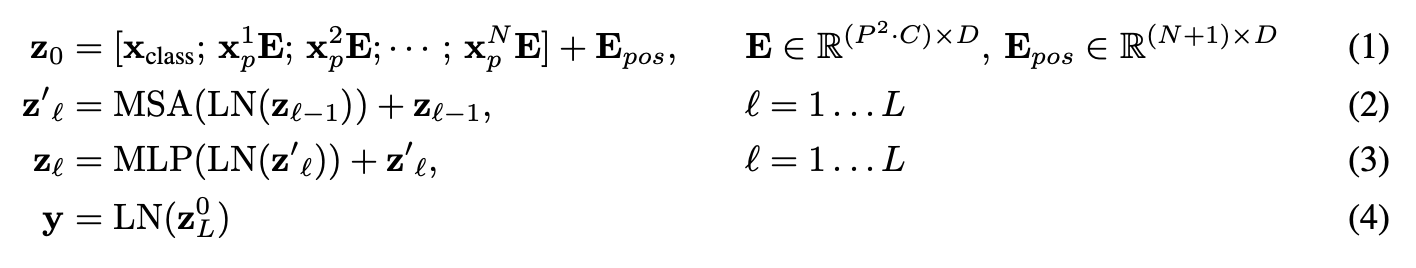

In [9]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-four-equations.png

IPython.display.Image("08-vit-paper-four-equations.png")

# 3. 1 VIT overview:

1. Figure 1: visual overview of the architecture
2. 4 equations: which define the funcitons of each input/label
3. Table 1: different hyperparameters for the architecture/training.
4. Text


```python

# img = 224 x 224
p = 16 # patch size
patches = []
image_0 = image[0]
for i in range(0, 224, p):
    for j in range(0, 224, p):
        if i < (224-p) and j < (224 -p):
            patch = image_0[i:i+p, j:j+p]

        patches.append(patch)

patches = torch.stack(patches)
patches.shape

```


## 4. Equation 1: Split data into patches and creating the class, position and patch embedding.

Layers = input -> Function -> output

What's the input shape? What's the output shape?

...The Transformer uses constant latent vector size  
D
  through all of its layers, so we flatten the patches and map to  
D
  dimensions with a trainable linear projection (Eq. 1). We refer to the output of this projection as the patch embeddings... Position embeddings are added to the patch embeddings to retain positional information. We use standard learnable 1D position embeddings...

 * Input shape: $H\times{W}\times{C}$
 * Output shape: $N\times{P^2}$
 * H - Height
 * W - Width
 * N - Number of patches = $H \times{W}\div{P^2}$
 * P - patch size
 * D - constant latent vector size (see **Table 1**)

In [10]:
# create example

height = 224
width  = 224
color_channels = 3
patch_size = 16
number_of_patches = (height * width) // (patch_size ** 2)

embedding_layer_input_shape = (height, width, color_channels)
embedding_layer_output_shape = (number_of_patches, patch_size**2* color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 1D sequence of patches): {embedding_layer_output_shape} -> number_of_patches, embedding_size")

Input shape (single 2D image): (224, 224, 3)

Output shape (single 1D sequence of patches): (196, 768) -> number_of_patches, embedding_size

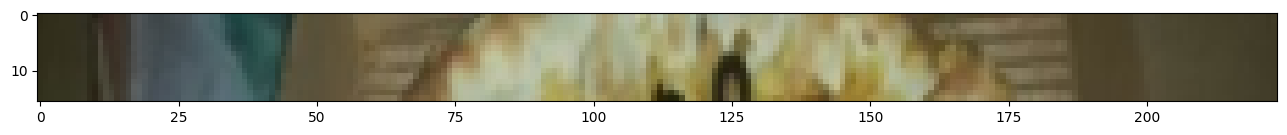

In [11]:
# get the top row of the image
image_permuted = image.permute(1,2,0) # (H, W, C)
patch_size = 16

plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :])

Number of patches per row = 14

Patch size: 16 pixels x 16 pixels.

Text(0.5, 0.98, 'pizza')

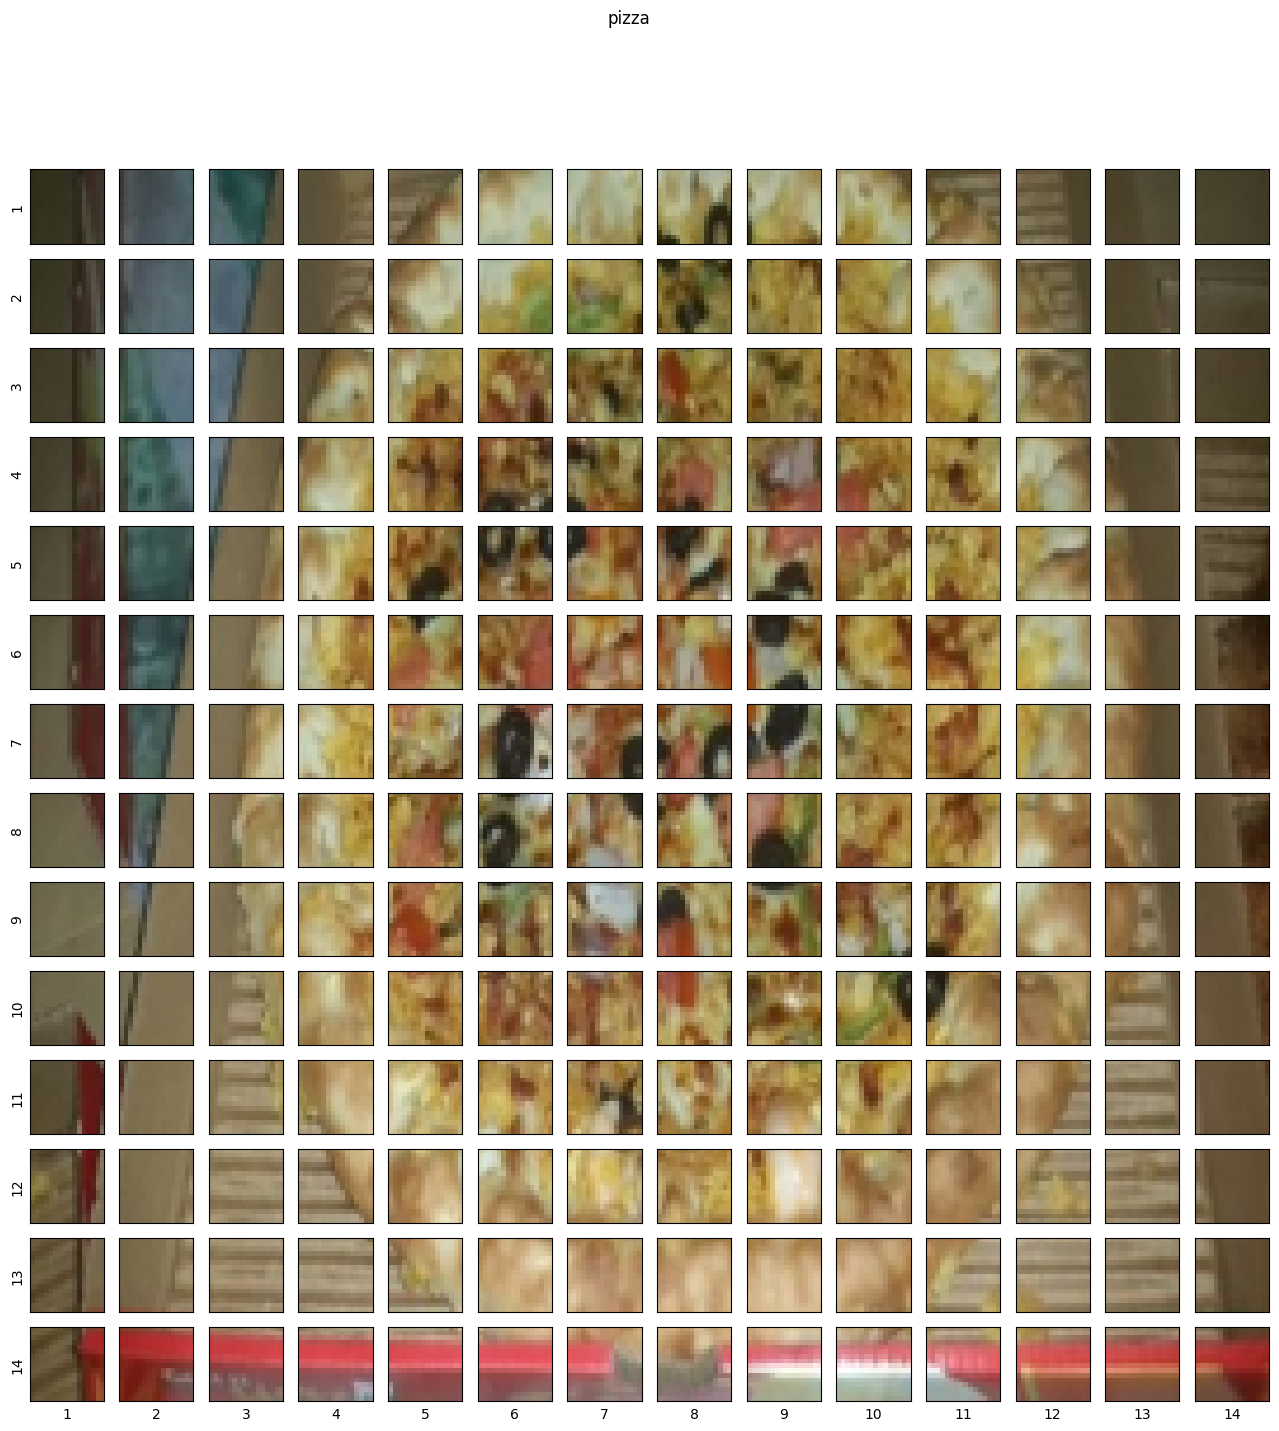

In [12]:
# set up code to plot top row as patches
img_size = 224
patch_size = 16
num_patches = img_size//patch_size

assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row = {num_patches}")
print(f"Patch size: {patch_size} pixels x {patch_size} pixels.")

fig, axs = plt.subplots(nrows=img_size // patch_size,
                        ncols=img_size // patch_size,
                        sharex = True,
                        sharey=True,
                        figsize=(patch_size, patch_size))






# iterate through number of patches in the top row
for i, patch_x in enumerate(range(0, img_size, patch_size)):
    for j, patch_y in enumerate(range(0, img_size, patch_size)):
        axs[i, j].imshow(image_permuted[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size, :])
        axs[i, j].set_xlabel(j+1)
        axs[i, j].set_ylabel(i+1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

fig.suptitle(f"{label}")

### 4.3 Creating image patches and turning them into patch embeddings

* Create the image patches and the image patch embeddings in a single step using `torch.nn.Conv2D` and setting the `kernel_size` and `stride` into `patch_size`.

* Then flatten the convoluted image with `torch.nn.Flatten`

In [13]:
nn.Conv2d(in_channels=3,
            out_channels=768,
            kernel_size=patch_size,
            stride=patch_size,
            padding=0)

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

In [14]:
convoluted_image = nn.Conv2d(in_channels=3,
            out_channels=768,
            kernel_size=patch_size,
            stride=patch_size,
            padding=0)(image.unsqueeze(0)) # add batch size

convoluted_image.shape

torch.Size([1, 768, 14, 14])

Showing random convolutional features maps from indexes: [492, 599, 619]

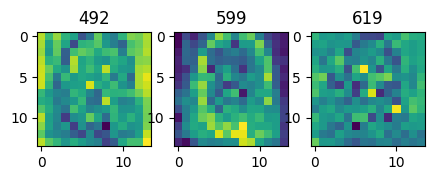

In [15]:
# plot random convolutional feature maps (embeddings)
import random
random_indexs = random.sample(range(0, 758), k=3)

print(f"Showing random convolutional features maps from indexes: {random_indexs}")

# create plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5, 15))
for i, idx in enumerate(random_indexs):
    # squeeze, detach from grad tracking
    tmp = convoluted_image.squeeze().detach().numpy()[idx]
    axs[i].imshow(tmp)
    axs[i].set_title(idx)


In [16]:
# Get a single feature map in tensor form
single_feature_map = convoluted_image[:, 0, :, :]
single_feature_map, single_feature_map.requires_grad


(
    tensor([[[-0.0553, -0.0680, -0.1002, -0.1080, -0.1327, -0.1943, -0.1994,
          -0.1542, -0.2304, -0.2155, -0.1245, -0.1060, -0.1049, -0.0860],
         [-0.0631, -0.1165, -0.1532, -0.1248, -0.2598, -0.2447, -0.1738,
          -0.0916, -0.1971, -0.2144, -0.1983, -0.1446, -0.0982, -0.0869],
         [-0.0571, -0.1352, -0.1035, -0.1927, -0.1999, -0.0478, -0.0821,
          -0.1111, -0.0459, -0.1102, -0.2115, -0.1272, -0.0946, -0.0901],
         [-0.0762, -0.0973, -0.1542, -0.2392, -0.0672, -0.0727, -0.0622,
          -0.1157, -0.1454, -0.1037, -0.0897, -0.1850, -0.0965, -0.0944],
         [-0.0955, -0.0759, -0.1376, -0.2777, -0.0584, -0.0455, -0.2326,
          -0.1035, -0.1718, -0.1042, -0.1779, -0.0670, -0.0865, -0.1198],
         [-0.1070, -0.1207, -0.1364, -0.2690, -0.0740, -0.1429, -0.1233,
          -0.1960, -0.1191, -0.3102, -0.1243, -0.2177, -0.0916, -0.0836],
         [-0.1304, -0.1061, -0.1484, -0.2854, -0.1743,  0.1046, -0.1329,
          -0.1947,  0.0107, -0.1789, -

### 4.4 Flattening the patch with `nn.Flatten`

In [17]:
flattened_image = nn.Flatten(2,3)(convoluted_image).permute(0,2,1)
flattened_image.shape

torch.Size([1, 196, 768])

Original image shape: torch.Size([3, 224, 224])

Image feature map shape: torch.Size([1, 768, 14, 14])

Flattened image feature map shape: torch.Size([1, 196, 768])

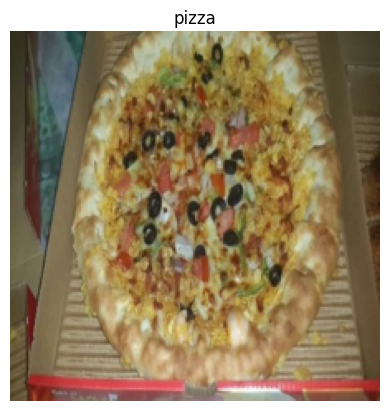

In [18]:
# 1. View single image
plt.imshow(image.permute(1, 2, 0)) # adjust for matplotlib
plt.title(label)
plt.axis(False);
print(f"Original image shape: {image.shape}")

# 2. Turn image into feature maps
conv2d = nn.Conv2d(in_channels=3,
            out_channels=768,
            kernel_size=patch_size,
            stride=patch_size,
            padding=0)
convoluted_image = conv2d(image.unsqueeze(0)) # add batch dimension to avoid shape errors
print(f"Image feature map shape: {convoluted_image.shape}")

# 3. Flatten the feature maps & permute to get the right order
flatten = nn.Flatten(2,3)
flattened_image = flatten(convoluted_image).permute(0,2,1)
print(f"Flattened image feature map shape: {flattened_image.shape}")

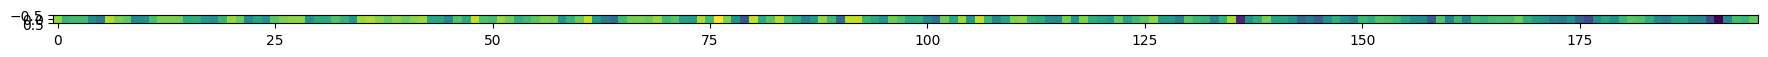

In [19]:
plt.figure(figsize=(22, 22))
plt.imshow(flattened_image[:, :, 0].detach().numpy())

### 4.5 Turning the VIT patch embedding layer into a PyTorch module

We want this module to do a few things:
1. Create a class called `PatchEmbedding`
2. Initialize with appropriate hyper parameters such as channels, embedding dimension and patch size.
3. Create a layer to turn an image into embedded patches using `nn.Conv2d`
4. Create a layer to flatten the feature maps of the output of step 3
5. Define a `forward()` method that defines the forward computation i.e. pass through layers 3 to 4
6. Make sure the output shape of the layer reflects the required output shape of the patch embedding.

In [20]:
class PatchEmbedding(nn.Module):
    def __init__(self,
                 channels: int =3,
                 embedding_dim: int =768,
                 patch_size: int =16):
        super().__init__()
        # conv layer
        self.patch_size=patch_size
        self.patcher = nn.Conv2d(in_channels=channels,
                  out_channels=embedding_dim,
                  kernel_size=patch_size,
                  stride=patch_size,
                  padding=0)
        # flatten layer
        self.flatten = nn.Flatten(2,3)
    def forward(self, x):
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"
        x = self.patcher(x)
        x = self.flatten(x)
        x = x.permute(0,2,1)
        return x


In [21]:
set_seeds()
# create an instance of patch embedding layer
patchify = PatchEmbedding()
print(f"Pass a single image through the embedding layer")
print(f"Input image size: {image.unsqueeze(0).shape}") # batchify first
patch_embedded_image = patchify(image.unsqueeze(0))

print(f"Output image size: {patch_embedded_image.shape}") # batchify first

Pass a single image through the embedding layer

Input image size: torch.Size([1, 3, 224, 224])

Output image size: torch.Size([1, 196, 768])

In [22]:
patchify.state_dict().keys()

odict_keys(['patcher.weight', 'patcher.bias'])

## Creating the class token embedding
To prepend a learnable class token to the start of the patch embedding

* Using `nn.Parameter` to create a learnable parameter.

In [23]:
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[-1]
batch_size, embedding_dimension

(1, 768)

In [24]:
# create class token embedding as a learnable parameter that shares the same size
# as the embedding dimension (D)

class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                            requires_grad = True) # by default but added for completeness
class_token.shape, patch_embedded_image.shape

(torch.Size([1, 1, 768]), torch.Size([1, 196, 768]))

In [25]:
# add the class token embedding to the front of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat(
    (class_token, patch_embedded_image),
    dim=1 # number of patches dimension
)
print(patch_embedded_image_with_class_embedding)
print(f"Sequence of patch embeddings with class token prepended shape:\
 {patch_embedded_image_with_class_embedding.shape} -> \
 \n(batch_size: {batch_size}, number_of_patches plus class_token: {num_patches**2+1}, embedding_dimension: {embedding_dimension})")

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.2527,  0.0525, -0.0801,  ...,  0.1596, -0.1020,  0.0574],
         [-0.3379,  0.1481, -0.1608,  ...,  0.2679, -0.1278,  0.1120],
         ...,
         [-0.6191,  0.1148, -0.0593,  ...,  0.2342, -0.2979,  0.2017],
         [-0.5113,  0.1391, -0.0679,  ...,  0.2271, -0.2924,  0.2299],
         [-0.3950, -0.0280, -0.0418,  ...,  0.1083, -0.2246,  0.2043]]],
       grad_fn=<CatBackward0>)

Sequence of patch embeddings with class token prepended shape: torch.Size([1, 197, 768]) ->  
(batch_size: 1, number_of_patches plus class_token: 197, embedding_dimension: 768)

In [26]:
rand_image_tensor = torch.randn(1, 3, 224, 224)
rand_image_tensor_bad = torch.randn(1, 3, 250, 250)

patchify(rand_image_tensor)
try:
    patchify(rand_image_tensor_bad)
except Exception as e:
    print(e)

Input image size must be divisble by patch size, image shape: 250, patch size: 16

## Creating the Positional Embeddings:

- Create a series of 1D learnable position embeddings and to add them to the sequence of patch embeddings.

In [27]:
# view the sequence of patch embeddings so far

patch_embedded_image_with_class_embedding.shape

torch.Size([1, 197, 768])

In [28]:
# calculate N (number of patches)
number_of_patches = int((height * width) / (patch_size ** 2))

# get the embedding dimension
embedding_dimension = patch_embedded_image_with_class_embedding.shape[-1]
display(embedding_dimension)

# create learnable 1D position embedding
position_embedding = nn.Parameter(torch.ones(batch_size,
                                             number_of_patches+1,
                                             embedding_dimension))
display(position_embedding, position_embedding.shape)

# add the position embedding to the patch-and-class token embedding

print(f"Patch-and-class embedding before position embedding : \n{patch_embedded_image_with_class_embedding}")
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding
print(f"Patch and position embedding: \n{patch_and_position_embedding}")
print(f"Shape of patch_and_position_embedding: {patch_and_position_embedding.shape}")

768


Parameter containing:
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]], requires_grad=True)

torch.Size([1, 197, 768])

Patch-and-class embedding before position embedding : 
tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.2527,  0.0525, -0.0801,  ...,  0.1596, -0.1020,  0.0574],
         [-0.3379,  0.1481, -0.1608,  ...,  0.2679, -0.1278,  0.1120],
         ...,
         [-0.6191,  0.1148, -0.0593,  ...,  0.2342, -0.2979,  0.2017],
         [-0.5113,  0.1391, -0.0679,  ...,  0.2271, -0.2924,  0.2299],
         [-0.3950, -0.0280, -0.0418,  ...,  0.1083, -0.2246,  0.2043]]],
       grad_fn=<CatBackward0>)

Patch and position embedding: 
tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.7473, 1.0525, 0.9199,  ..., 1.1596, 0.8980, 1.0574],
         [0.6621, 1.1481, 0.8392,  ..., 1.2679, 0.8722, 1.1120],
         ...,
         [0.3809, 1.1148, 0.9407,  ..., 1.2342, 0.7021, 1.2017],
         [0.4887, 1.1391, 0.9321,  ..., 1.2271, 0.7076, 1.2299],
         [0.6050, 0.9720, 0.9582,  ..., 1.1083, 0.7754, 1.2043]]],
       grad_fn=<AddBackward0>)

Shape of patch_and_position_embedding: torch.Size([1, 197, 768])

In [29]:
inspect(number_of_patches)

╭────── <class 'int'> ───────╮
│ int([x]) -> integer        │
│ int(x, base=10) -> integer │
│                            │
│ ╭────────────────────────╮ │
│ │ 196                    │ │
│ ╰────────────────────────╯ │
│                            │
│ denominator = 1            │
│        imag = 0            │
│   numerator = 196          │
│        real = 196          │
╰────────────────────────────╯

## Putting it all together in one cell

In [30]:
set_seeds()

# 1. Set patch size & embedding size
patch_size = 16
embedding_dimension = 768

# 2. Print shape of original image tensor and get the image dimensions
print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]

# 3. Get image tensor and add batch dimension
x = image.unsqueeze(0)
print(f"Input image with batch dimension shape: {x.shape}")

# 4. Create patch embedding layer
patch_embedding_layer = PatchEmbedding(channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=embedding_dimension)

# 5. Pass image through patch embedding layer
patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")

# 6. Create class token embedding
batch_size = patch_embedding.shape[0]
assert  embedding_dimension == patch_embedding.shape[-1], "There's something wrong with this patch embedding shape"
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True) # make sure it's learnable
print(f"Class token embedding shape: {class_token.shape}")

# 7. Prepend class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")

# 8. Create position embedding
number_of_patches = int((height * width) / patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True) # make sure it's learnable

# 9. Add position embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")

Image tensor shape: torch.Size([3, 224, 224])

Input image with batch dimension shape: torch.Size([1, 3, 224, 224])

Patching embedding shape: torch.Size([1, 196, 768])

Class token embedding shape: torch.Size([1, 1, 768])

Patch embedding with class token shape: torch.Size([1, 197, 768])

Patch and position embedding shape: torch.Size([1, 197, 768])

In [2]:
224 * 224 / (16 * 16 * 16)

12.25

In [33]:
class PatchEmbedding(nn.Module):
    def __init__(self,
                 channels=3,
                 image_size=224,
                 patch_size=16,
                 embedding_dim = 768):
        super().__init__()
        self.patch_size = patch_size
        self.conv2d = nn.Conv2d(in_channels=channels,
                                out_channels = embedding_dim,
                                kernel_size = patch_size,
                                stride = patch_size,
                                padding = 0)
        self.flatten = nn.Flatten(-2, -1)

    def forward(self, x):
        print(x.shape)
        assert not (x.shape[-2] * x.shape[-1] % (patch_size * patch_size)), "Image dimension must be divisible by patch size"
        x = conv2d(x)
        print(x.shape)
        x = flatten(x)
        print(x.shape)
        return x.permute(0, -1, -2)

class PositionEmbedding(nn.Module):
    def __init__(self):
        super().__init__()


## Equation 2 - Multihead SelfAttention (MSA Block)

* Which part of a sequence should pay the most attention to itself?
* In our case, we have a series of embedded image patches, which patch significantly relates to another patch.
* We want our neural network (VIT) to learn this relationship/representation.
* To replicate MSA in Pytorch, we can use'
* LayerNormalization: https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html

* Normalization: make everything have the same mean and the same standard deviation. Normalizes